In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import plotly.express as px
import plotly.graph_objects as go

/tungstenfs/nobackup/ggrossha/gypafoiv/miniconda3/envs/python_3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='o'
s=10
legend=False
linewidth=0
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
WT__Dpf_3_null_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_small_RNA.set_index("id", inplace=True)
WT__Dpf_3_null_small_RNA.columns = WT__Dpf_3_null_small_RNA.columns + "_small_RNA"

WT__Dpf_3_null_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_total_RNA.set_index("id", inplace=True)
WT__Dpf_3_null_total_RNA.columns = WT__Dpf_3_null_total_RNA.columns + "_total_RNA"

WT__Dpf_3_null = pd.merge(WT__Dpf_3_null_small_RNA, WT__Dpf_3_null_total_RNA, 
                          on="id",
                          how="inner")

WT__Dpf_3_null.reset_index(inplace=True)

In [4]:
WT__Dpf_3_null["Significant"] = "No"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"

WT__Dpf_3_null["Significant"].value_counts()

small_RNA    1946
No           1024
both          353
total_RNA      87
Name: Significant, dtype: int64

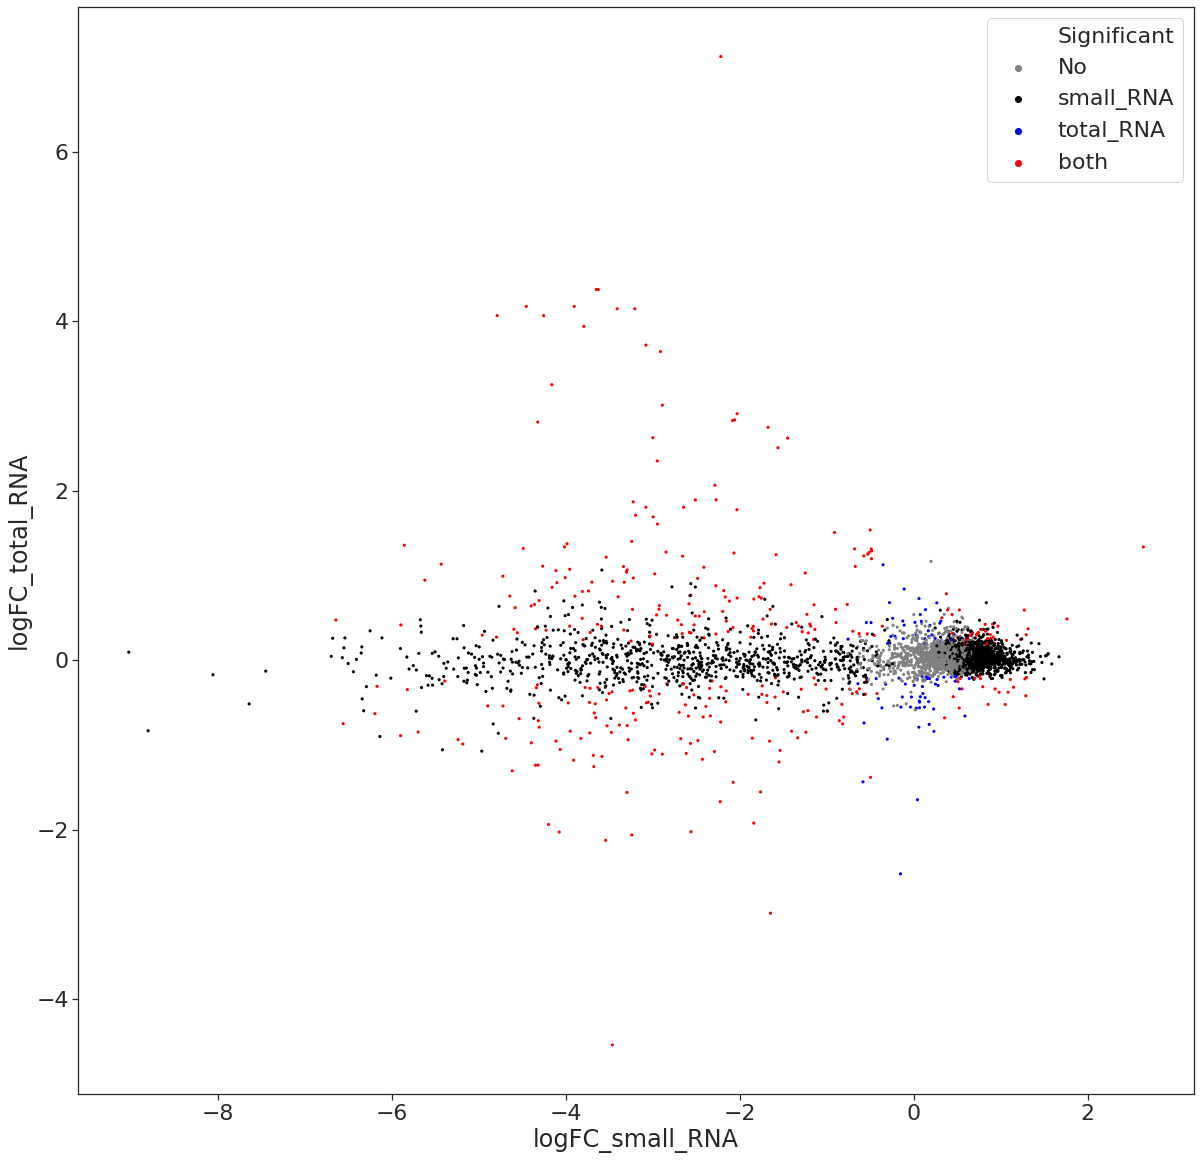

In [5]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "small_RNA", "total_RNA", "both"],
                           palette=["gray", "black", "blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-Dpf-3_null_4_color.pdf")

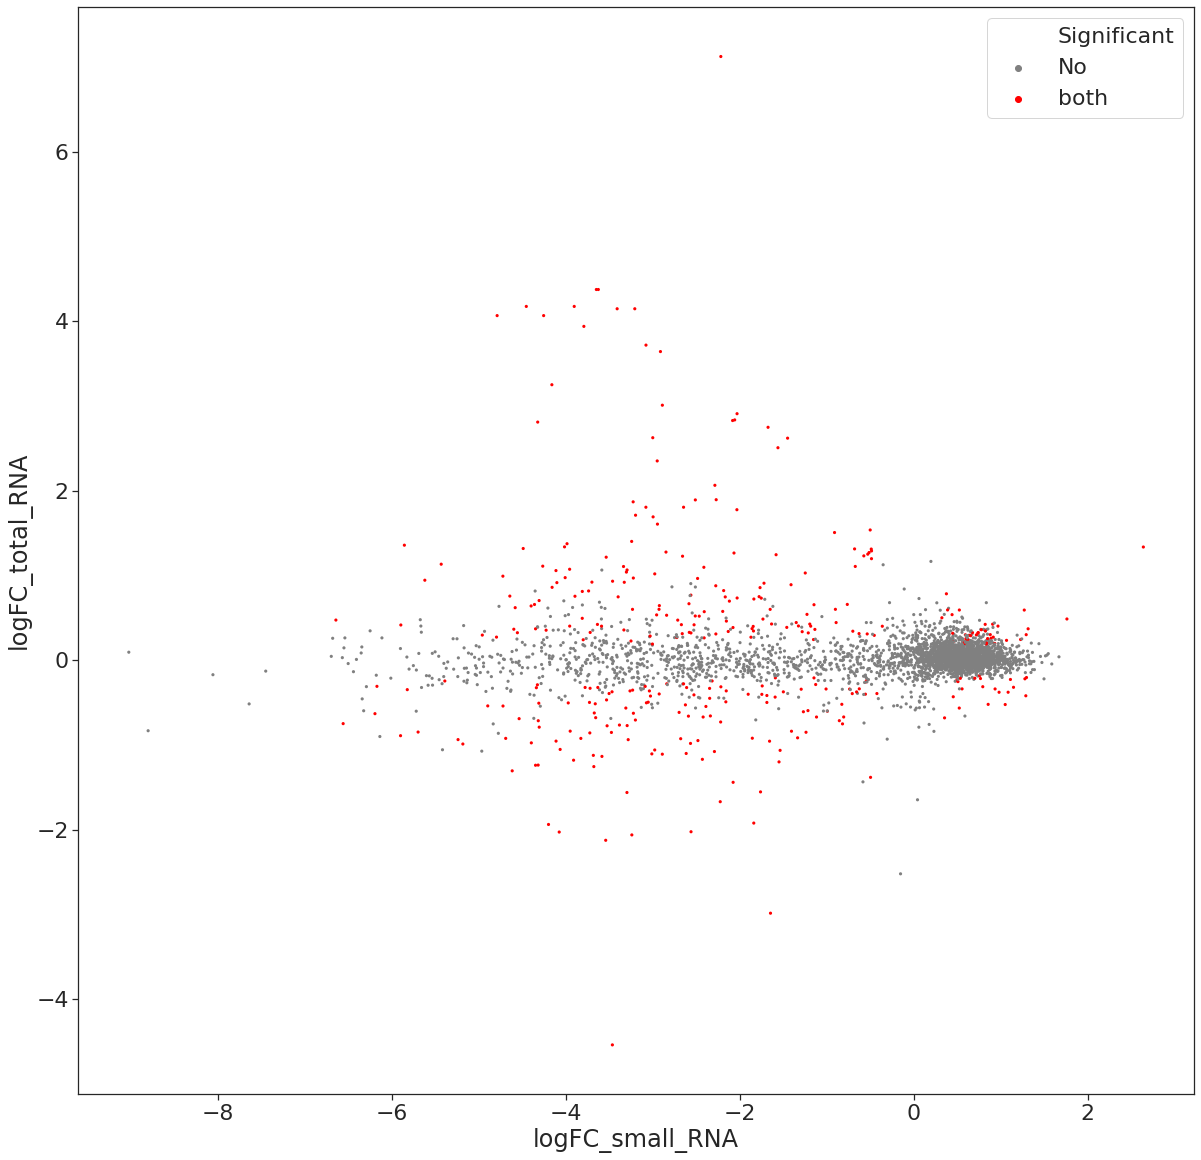

In [6]:
WT__Dpf_3_null["Significant"] = "No"
WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"
WT__Dpf_3_null["Significant"].value_counts()

sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "both"],
                           palette=["gray", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-Dpf-3_null.pdf")

In [7]:
WT__Dpf_3_null[WT__Dpf_3_null["Significant"] == "both"].to_csv("FC_vs_FC_small-RNA_vs_total-RNA-Dpf-3_null.tsv", header=True, index=False, sep="\t")

In [8]:
WT__Dpf_3_null[WT__Dpf_3_null["sequence_small_RNA"]=="ZC15.3"][["logFC_small_RNA", "logFC_total_RNA"]]

logFC_small_RNA  logFC_total_RNA
2187        -3.791408          3.93896

In [9]:
Dpf_3_null_down = WT__Dpf_3_null[(WT__Dpf_3_null["FDR_small_RNA"]<0.05) &
                                 (WT__Dpf_3_null["logFC_small_RNA"]<0) &
                                 (WT__Dpf_3_null["FDR_total_RNA"]<0.05) &
                                 (WT__Dpf_3_null["logFC_total_RNA"]<0)]["id"].to_list()

In [10]:
Dpf_3_null_down_small_up_total = WT__Dpf_3_null[(WT__Dpf_3_null["FDR_small_RNA"]<0.05) &
                                                (WT__Dpf_3_null["logFC_small_RNA"]<0) &
                                                (WT__Dpf_3_null["FDR_total_RNA"]<0.05) &
                                                (WT__Dpf_3_null["logFC_total_RNA"]>0)]["id"].to_list()

In [11]:
WT__Dpf_3_null.fillna("?", inplace=True)

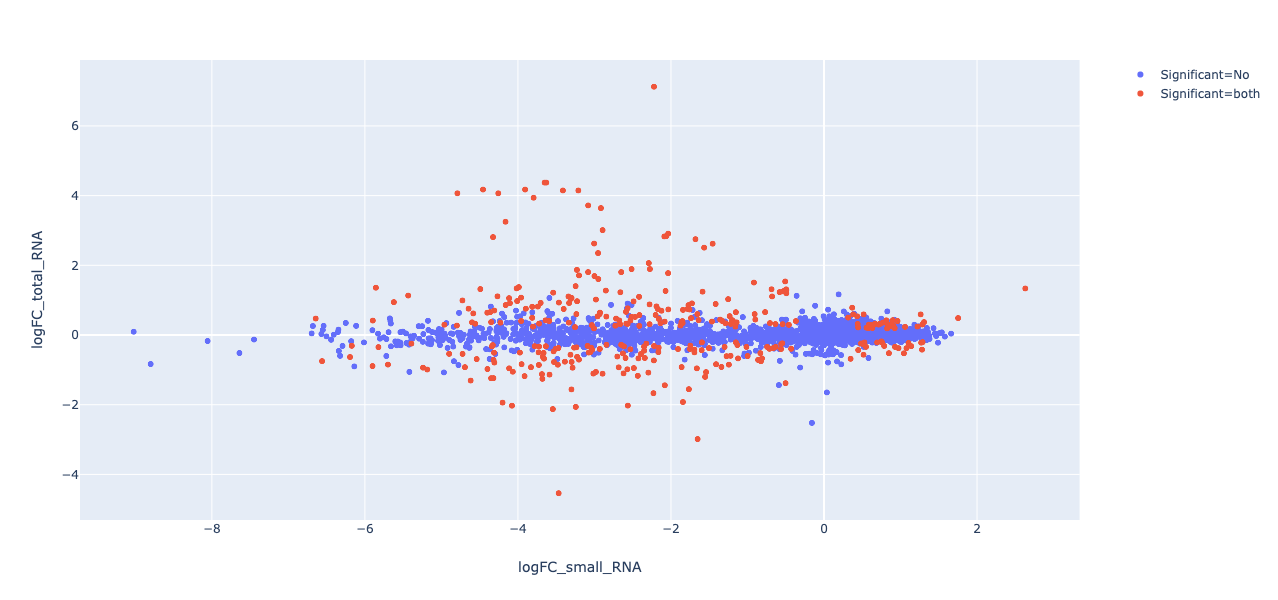

In [12]:
px.scatter(WT__Dpf_3_null,
           x="logFC_small_RNA",
           y="logFC_total_RNA",
           color="Significant",
           hover_data=['gene_name_total_RNA', 
                       'sequence_total_RNA',
                       'gene_biotype_total_RNA', 
                       'repName_total_RNA',
                       'repClass_total_RNA',
                       'repFamily_total_RNA'
                      ])

# Mut-2

In [13]:
WT__mut_2_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
                                  header=0,
                                  sep="\t")
WT__mut_2_small_RNA.set_index("id", inplace=True)
WT__mut_2_small_RNA.columns = WT__mut_2_small_RNA.columns + "_small_RNA"

WT__mut_2_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
                                  header=0,
                                  sep="\t")
WT__mut_2_total_RNA.set_index("id", inplace=True)
WT__mut_2_total_RNA.columns = WT__mut_2_total_RNA.columns + "_total_RNA"

WT__mut_2 = pd.merge(WT__mut_2_small_RNA, WT__mut_2_total_RNA, 
                          on="id", 
                          how="inner")

WT__mut_2.reset_index(inplace=True)

In [14]:
WT__mut_2["Significant"] = "No"
WT__mut_2.loc[WT__mut_2["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__mut_2.loc[WT__mut_2["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"

WT__mut_2["Significant"].value_counts()

both         983
small_RNA    887
total_RNA    533
No           423
Name: Significant, dtype: int64

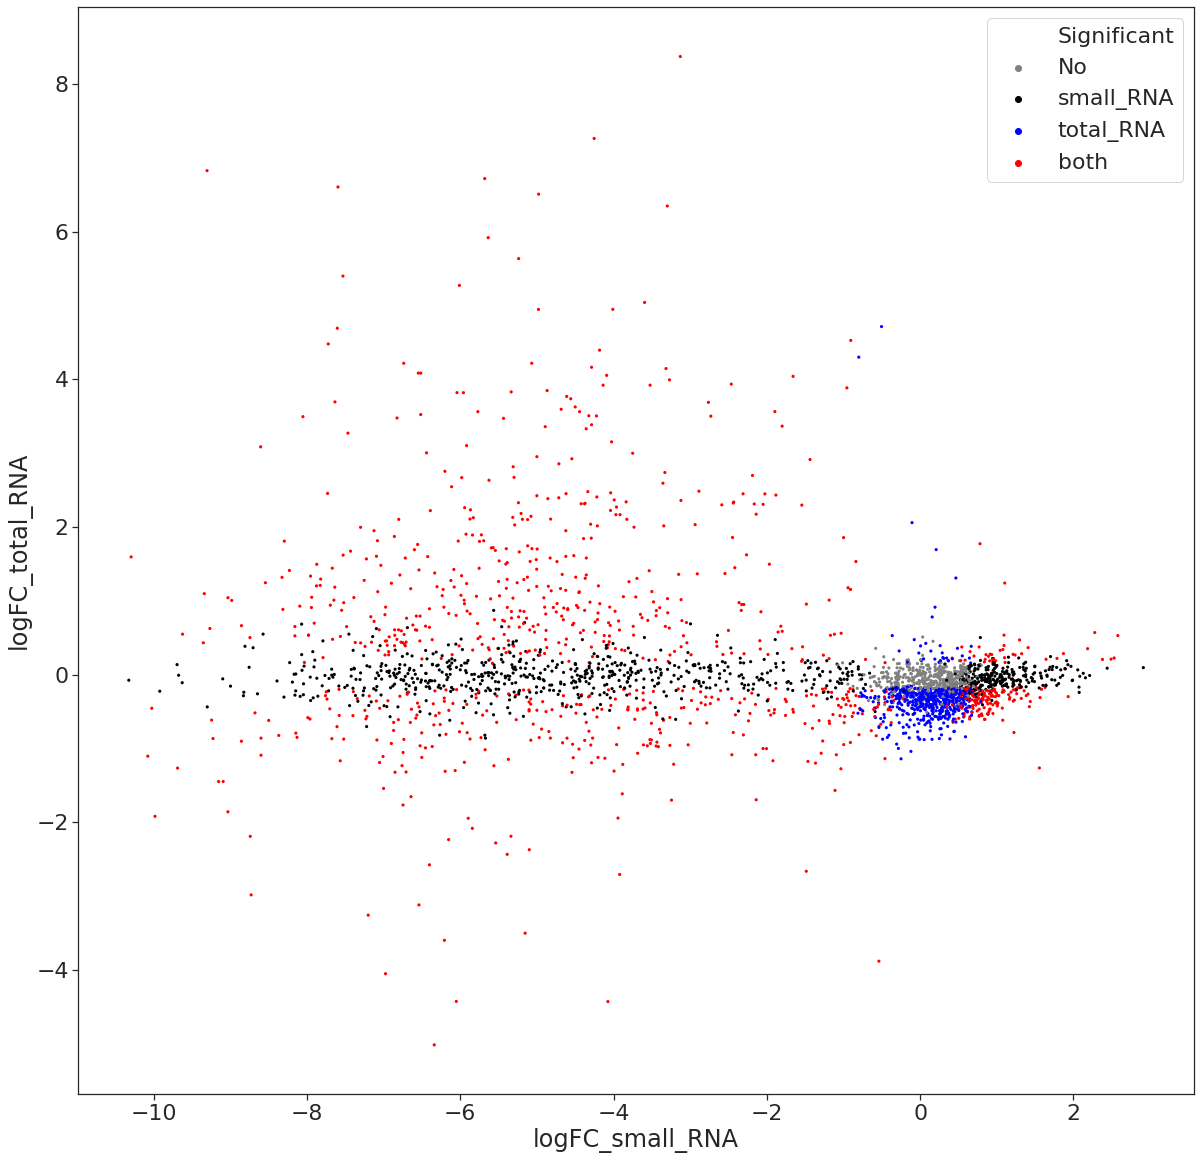

In [15]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__mut_2,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "small_RNA", "total_RNA", "both"],
                           palette=["gray", "black", "blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-mut-2_4_color.pdf")

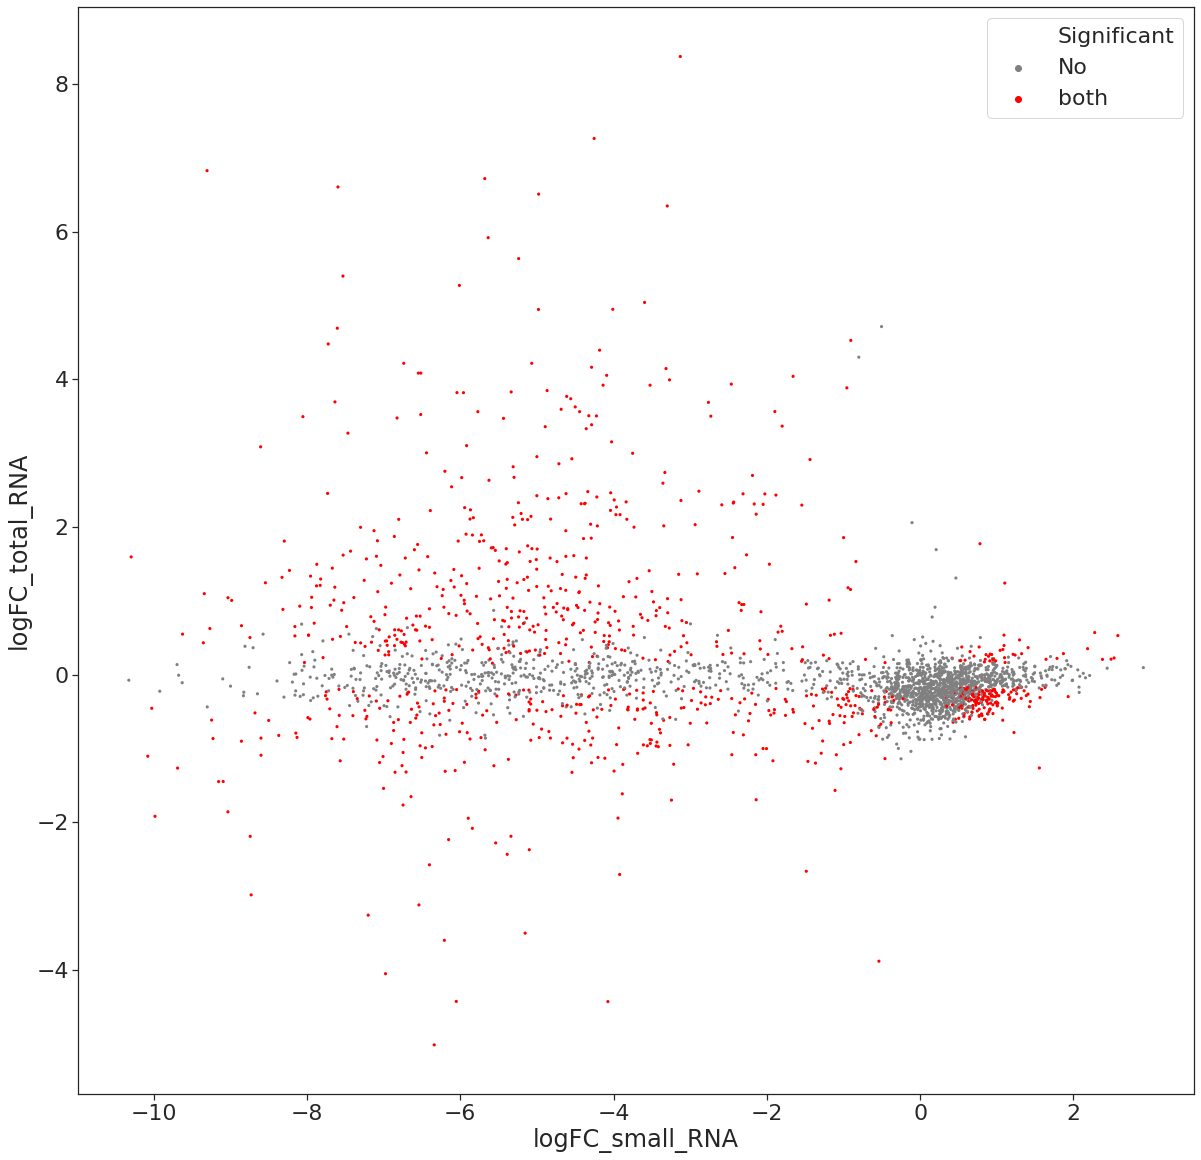

In [16]:
WT__mut_2["Significant"] = "No"
WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"
WT__mut_2["Significant"].value_counts()

sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__mut_2,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "both"],
                           palette=["gray", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-mut-2.pdf")

In [17]:
WT__mut_2[WT__mut_2["Significant"] == "both"].to_csv("FC_vs_FC_small-RNA_vs_total-RNA-mut-2.tsv", header=True, index=False, sep="\t")

In [18]:
mut2_down = WT__mut_2[(WT__mut_2["FDR_small_RNA"]<0.05) &
                      (WT__mut_2["logFC_small_RNA"]<0) &
                      (WT__mut_2["FDR_total_RNA"]<0.05) &
                      (WT__mut_2["logFC_total_RNA"]<0)]["id"].to_list()

In [19]:
mut2_down_small_up_total = WT__mut_2[(WT__mut_2["FDR_small_RNA"]<0.05) &
                                     (WT__mut_2["logFC_small_RNA"]<0) &
                                     (WT__mut_2["FDR_total_RNA"]<0.05) &
                                     (WT__mut_2["logFC_total_RNA"]>0)]["id"].to_list()

In [20]:
WT__mut_2.fillna("?", inplace=True)

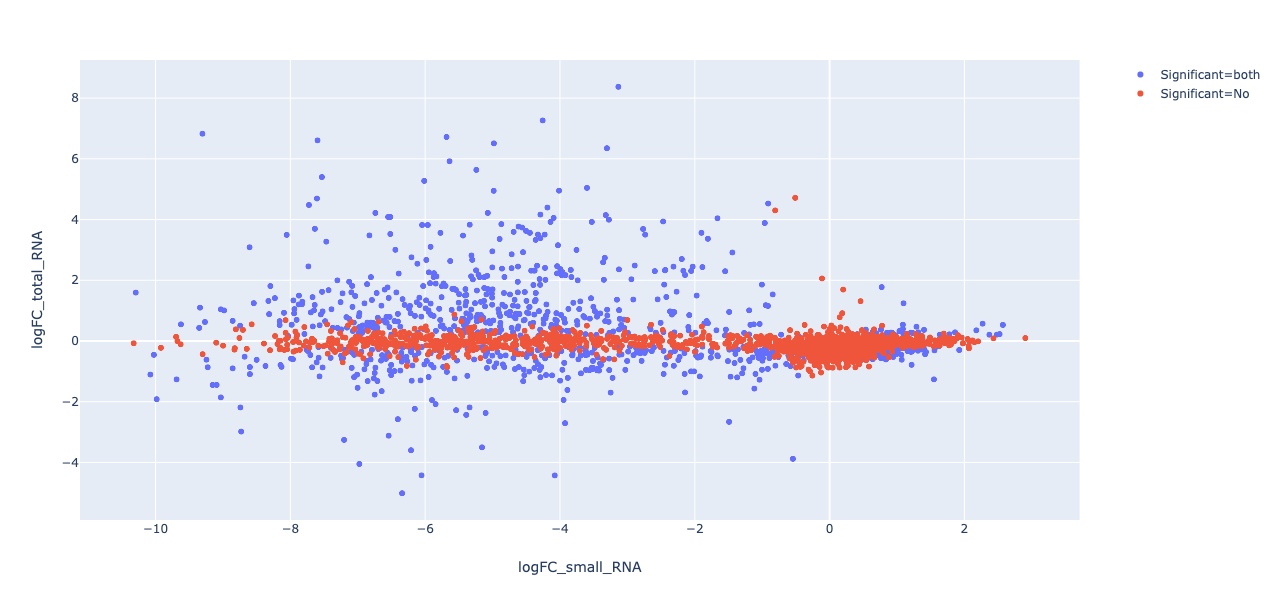

In [21]:
px.scatter(WT__mut_2,
           x="logFC_small_RNA",
           y="logFC_total_RNA",
           color="Significant",
           hover_data=['gene_name_total_RNA', 
                       'sequence_total_RNA',
                       'gene_biotype_total_RNA', 
                       'repName_total_RNA',
                       'repClass_total_RNA',
                       'repFamily_total_RNA'
                      ])

# Compare Dpf_3_null_down and mut2_down

In [22]:
len(Dpf_3_null_down), len(mut2_down)

(132, 329)

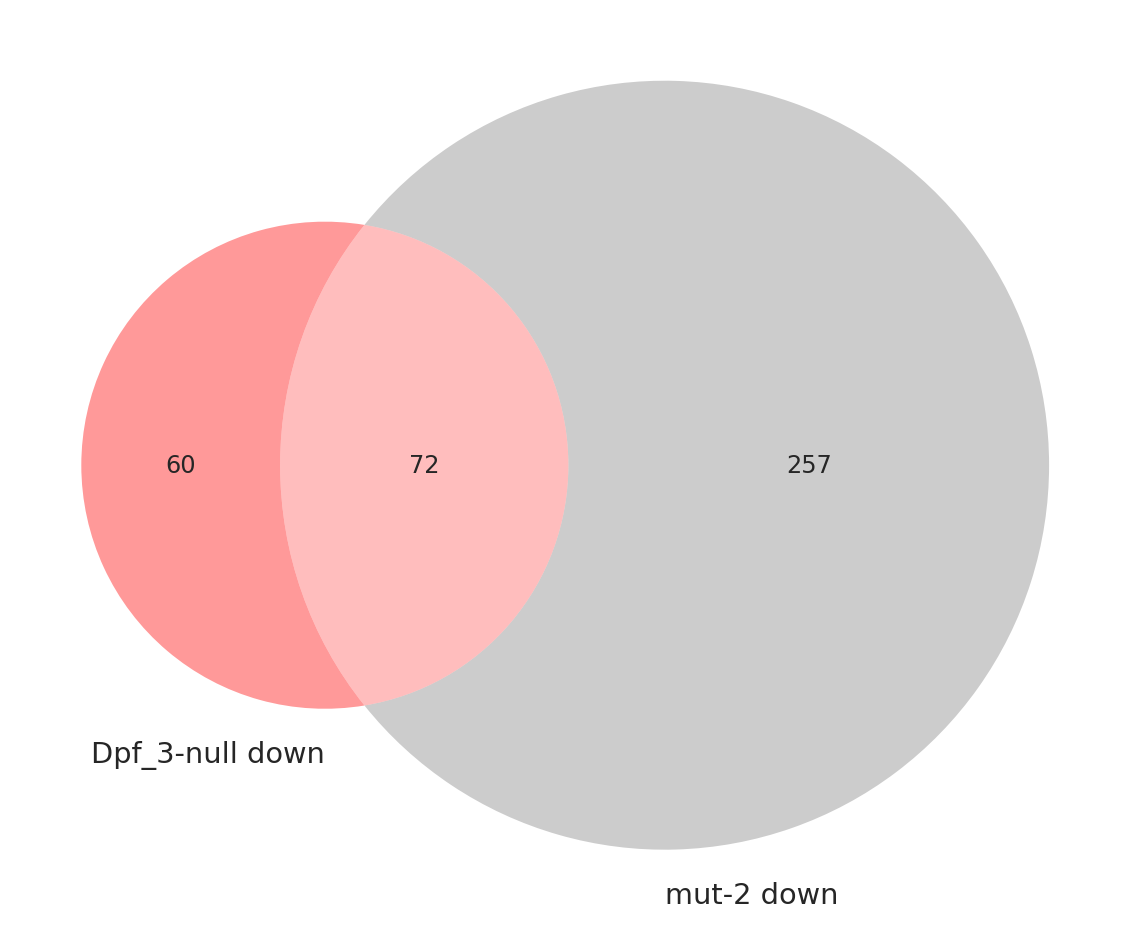

In [23]:
plt.figure(figsize=(20,20))
venn2([set(Dpf_3_null_down), 
       set(mut2_down)],
       set_labels = ('Dpf_3-null down', 'mut-2 down'),
       set_colors=('red', 'gray'))
plt.savefig("venn_downregulated__both_total_and_small_RNA_Dpf-3-null_and_mut-2.pdf")

In [24]:
len(WT__Dpf_3_null["id"]), len(WT__mut_2["id"])

(3410, 2826)

In [25]:
platform = WT__Dpf_3_null[WT__Dpf_3_null["id"].isin(WT__mut_2["id"])]["id"]

In [26]:
len(platform)

2737

In [27]:
q = list(set(Dpf_3_null_down) & set(mut2_down))

In [28]:
len(q)-1

71

In [29]:
m = list(set(Dpf_3_null_down) & set(platform))

In [30]:
len(m)

120

In [31]:
n = len(platform) - len(m)

In [32]:
n

2617

In [33]:
k = list(set(mut2_down) & set(platform))

In [34]:
len(k)

328

In [35]:
# R call
# q <- 71
# m <- 120
# n <- 2617
# k <- 328
# phyper(q, m, n, k, lower.tail = FALSE, log.p = FALSE) 

# Result: 1.813671e-38

# Compare Dpf_3_null_down_small_up_total and mut2_down_small_up_total

In [36]:
len(Dpf_3_null_down_small_up_total), len(mut2_down_small_up_total)

(160, 457)

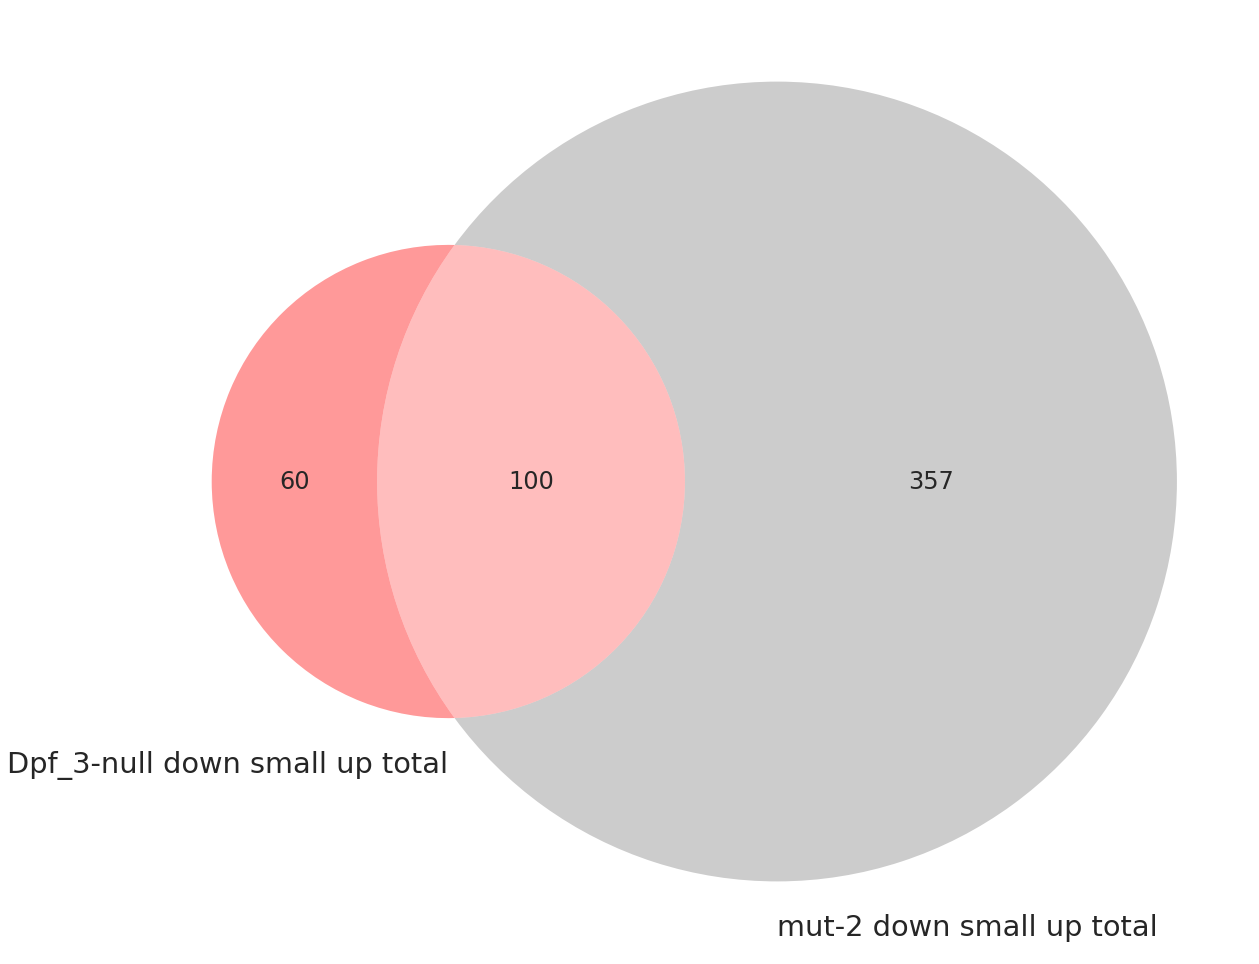

In [37]:
plt.figure(figsize=(20,20))
venn2([set(Dpf_3_null_down_small_up_total), 
       set(mut2_down_small_up_total)],
       set_labels = ('Dpf_3-null down small up total', 'mut-2 down small up total'),
       set_colors=('red', 'gray'))
plt.savefig("venn_downregulated_small_RNA_upregulated_total_RNA_Dpf-3-null_and_mut-2.pdf")

In [38]:
platform = WT__Dpf_3_null[WT__Dpf_3_null["id"].isin(WT__mut_2["id"])]["id"]

In [39]:
len(platform)

2737

In [40]:
q = list(set(Dpf_3_null_down_small_up_total) & set(mut2_down_small_up_total))

In [41]:
len(q)-1

99

In [42]:
m = list(set(Dpf_3_null_down_small_up_total) & set(platform))

In [43]:
len(m)

147

In [44]:
n = len(platform) - len(m)

In [45]:
n

2590

In [46]:
k = list(set(mut2_down_small_up_total) & set(platform))

In [47]:
len(k)

399

In [48]:
# R call
# q <- 99
# m <- 147
# n <- 2590
# k <- 399
# phyper(q, m, n, k, lower.tail = FALSE, log.p = FALSE) 

# Result: 4.630294e-53

# Repeat analysis but filter CPM on total RNAseq

In [49]:
# WT__Dpf_3_null_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
#                                        header=0,
#                                        sep="\t")
# WT__Dpf_3_null_small_RNA.set_index("id", inplace=True)
# WT__Dpf_3_null_small_RNA.columns = WT__Dpf_3_null_small_RNA.columns + "_small_RNA"

# WT__Dpf_3_null_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
#                                        header=0,
#                                        sep="\t")
# WT__Dpf_3_null_total_RNA = WT__Dpf_3_null_total_RNA[WT__Dpf_3_null_total_RNA["logCPM"]>0]
# WT__Dpf_3_null_total_RNA.set_index("id", inplace=True)
# WT__Dpf_3_null_total_RNA.columns = WT__Dpf_3_null_total_RNA.columns + "_total_RNA"

# WT__Dpf_3_null = pd.merge(WT__Dpf_3_null_small_RNA, WT__Dpf_3_null_total_RNA, 
#                           on="id",
#                           how="inner")

# WT__Dpf_3_null.reset_index(inplace=True)

In [50]:
# WT__Dpf_3_null["Significant"] = "No"
# WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
# WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
# WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"

# WT__Dpf_3_null["Significant"].value_counts()

In [51]:
# WT__Dpf_3_null["Significant"] = "No"
# WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"
# WT__Dpf_3_null["Significant"].value_counts()

# sns_plot = sns.scatterplot(x="logFC_small_RNA",
#                            y="logFC_total_RNA",
#                            data=WT__Dpf_3_null,
#                            s=s,
#                            hue="Significant",
#                            hue_order=["No", "both"],
#                            palette=["blue", "red"],
#                            alpha=alpha,
#                            x_jitter=x_jitter,
#                            y_jitter=y_jitter,
#                            linewidth=linewidth)
# plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-Dpf-3_null_FILTER_TOTAL_RNA_CPM.pdf")

In [52]:
# WT__mut_2_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
#                                   header=0,
#                                   sep="\t")
# WT__mut_2_small_RNA.set_index("id", inplace=True)
# WT__mut_2_small_RNA.columns = WT__mut_2_small_RNA.columns + "_small_RNA"

# WT__mut_2_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
#                                   header=0,
#                                   sep="\t")
# WT__mut_2_total_RNA = WT__mut_2_total_RNA[WT__mut_2_total_RNA["logCPM"]>0]
# WT__mut_2_total_RNA.set_index("id", inplace=True)
# WT__mut_2_total_RNA.columns = WT__mut_2_total_RNA.columns + "_total_RNA"

# WT__mut_2 = pd.merge(WT__mut_2_small_RNA, WT__mut_2_total_RNA, 
#                           on="id", 
#                           how="inner")

In [53]:
# WT__mut_2["Significant"] = "No"
# WT__mut_2.loc[WT__mut_2["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
# WT__mut_2.loc[WT__mut_2["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
# WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"

# WT__mut_2["Significant"].value_counts()

In [54]:
# WT__mut_2["Significant"] = "No"
# WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"
# WT__mut_2["Significant"].value_counts()

# sns_plot = sns.scatterplot(x="logFC_small_RNA",
#                            y="logFC_total_RNA",
#                            data=WT__mut_2,
#                            s=s,
#                            hue="Significant",
#                            hue_order=["No", "both"],
#                            palette=["blue", "red"],
#                            alpha=alpha,
#                            x_jitter=x_jitter,
#                            y_jitter=y_jitter,
#                            linewidth=linewidth)
# plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-mut-2_FILTER_TOTAL_RNA_CPM.pdf")